         Price       Weight  Type  Price_norm  Weight_norm
0  23615.75928  61360.78729     1    0.748528     0.727693
1  24310.65894  59815.21582     1    0.852503     0.642088
2  23421.51716  60361.49124     1    0.719464     0.672345
3  24301.90094  61630.95458     1    0.851192     0.742657
4  23907.95918  63305.60879     1    0.792248     0.835412


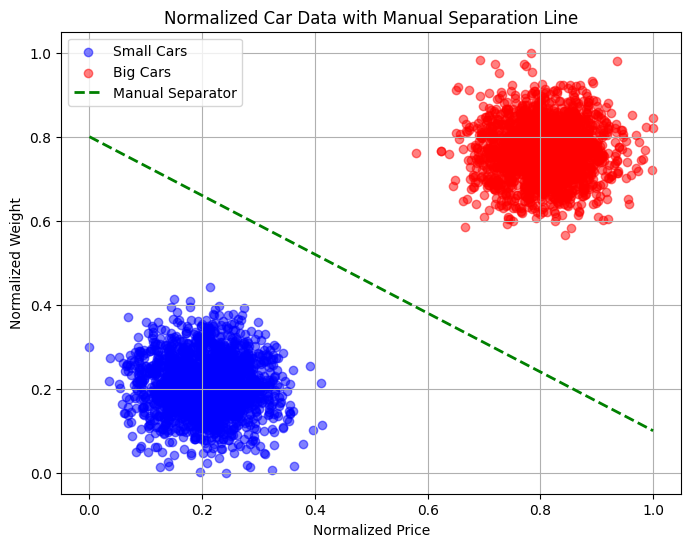

In [7]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset
df = pd.read_csv("groupA.txt", sep=",", header=None, names=["Price", "Weight", "Type"])

# Price and Weight normalizatio
df["Price_norm"] = (df["Price"] - df["Price"].min()) / (df["Price"].max() - df["Price"].min())
df["Weight_norm"] = (df["Weight"] - df["Weight"].min()) / (df["Weight"].max() - df["Weight"].min())

print(df.head())

# visualization
small_cars = df[df["Type"] == 0]
big_cars = df[df["Type"] == 1]

plt.figure(figsize=(8,6))
plt.scatter(small_cars["Price_norm"], small_cars["Weight_norm"], color='blue', label='Small Cars', alpha=0.5)
plt.scatter(big_cars["Price_norm"], big_cars["Weight_norm"], color='red', label='Big Cars', alpha=0.5)

# Manual separation line
x = [0, 1]
y = [0.8, 0.1]  
plt.plot(x, y, color='green', linestyle='--', linewidth=2, label='Manual Separator')

plt.xlabel("Normalized Price")
plt.ylabel("Normalized Weight")
plt.title("Normalized Car Data with Manual Separation Line")
plt.legend()
plt.grid(True)
plt.show()


weights (w1, w2) = (8.596780, 7.623308)
bias (b) = -7.889609

Linear decision function:
  f(x) = 8.596780 * Price_norm + 7.623308 * Weight_norm + -7.889609

Inequality selecting 'big' cars (Type = 1):
  Predict Type = 1 when f(x) >= 0
  i.e.,
    8.596780 * Price_norm + 7.623308 * Weight_norm + -7.889609 >= 0

Decision line in slope-intercept form (Weight_norm = m * Price_norm + c):
  Weight_norm = -1.127697 * Price_norm + 1.034932

Classifier training accuracy: 1.0000


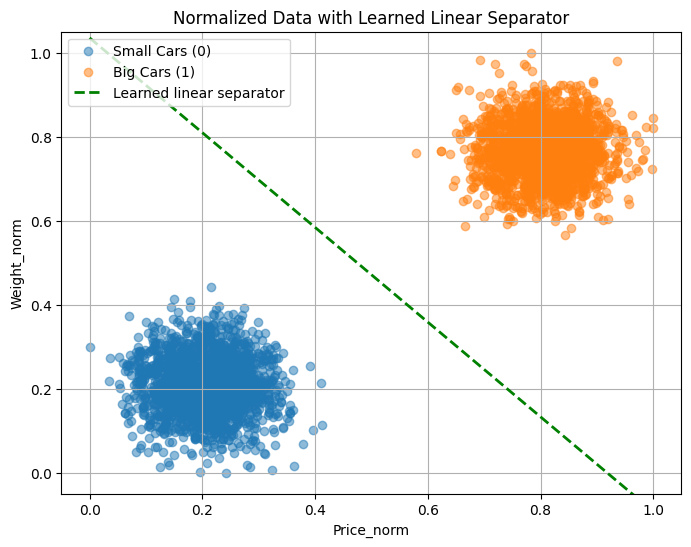

In [8]:

%matplotlib inline

from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

# preparing data (normalized features)
X = df[["Price_norm", "Weight_norm"]].values
y = df["Type"].values

# logistic regression (linear separator)
clf = LogisticRegression(solver='liblinear')  
clf.fit(X, y)

# extracting weights and bias
w1, w2 = clf.coef_[0]    
b = clf.intercept_[0]     

# printing numeric results
print(f"weights (w1, w2) = ({w1:.6f}, {w2:.6f})")
print(f"bias (b) = {b:.6f}")

# printing out the linear equation and inequality for predicting 'big' cars (Type = 1)
print("\nLinear decision function:")
print(f"  f(x) = {w1:.6f} * Price_norm + {w2:.6f} * Weight_norm + {b:.6f}")
print("\nInequality selecting 'big' cars (Type = 1):")
print("  Predict Type = 1 when f(x) >= 0")
print("  i.e.,")
print(f"    {w1:.6f} * Price_norm + {w2:.6f} * Weight_norm + {b:.6f} >= 0")


if abs(w2) > 1e-12:
    slope = -w1 / w2
    intercept = -b / w2
    print("\nDecision line in slope-intercept form (Weight_norm = m * Price_norm + c):")
    print(f"  Weight_norm = {slope:.6f} * Price_norm + {intercept:.6f}")
else:
    print("\nw2 is essentially zero; line is vertical (Price_norm = constant).")


acc = clf.score(X, y)
print(f"\nClassifier training accuracy: {acc:.4f}")

# plotting the data and decision boundary for visualization
small = df[df["Type"] == 0]
big = df[df["Type"] == 1]

plt.figure(figsize=(8,6))
plt.scatter(small["Price_norm"], small["Weight_norm"], label='Small Cars (0)', alpha=0.5)
plt.scatter(big["Price_norm"], big["Weight_norm"], label='Big Cars (1)', alpha=0.5)

# decision boundary line
xx = np.array([0.0, 1.0])
if abs(w2) > 1e-12:
    yy = slope * xx + intercept
    plt.plot(xx, yy, color='green', linestyle='--', linewidth=2, label='Learned linear separator')
else:
    x_const = -b / w1
    plt.axvline(x=x_const, color='green', linestyle='--', linewidth=2, label='Learned linear separator')

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.xlabel('Price_norm')
plt.ylabel('Weight_norm')
plt.legend()
plt.grid(True)
plt.title('Normalized Data with Learned Linear Separator')
plt.show()


In [13]:
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression



In [15]:
from sklearn.metrics import confusion_matrix


y_pred = clf.predict(X)

# computing confusion matrix
cm = confusion_matrix(y, y_pred)

# displaying confusion matrix nicely
tn, fp, fn, tp = cm.ravel()  # unpack
print("Confusion Matrix:")
print(cm)
print(f"\nTrue Negatives (small correctly predicted): {tn}")
print(f"False Positives (small predicted as big): {fp}")
print(f"False Negatives (big predicted as small): {fn}")
print(f"True Positives (big correctly predicted): {tp}")


Confusion Matrix:
[[2000    0]
 [   0 2000]]

True Negatives (small correctly predicted): 2000
False Positives (small predicted as big): 0
False Negatives (big predicted as small): 0
True Positives (big correctly predicted): 2000
